<a href="https://colab.research.google.com/github/MonitSharma/Learn-Quantum-Computing-with-Qiskit/blob/main/Multiple_Qubits_and_Entanglement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mutliple Qubits and Entanglement

We've seen some interesting effects with isolated qubits and single qubit gates, but the true power of quantum computing comes from interactions between qubits. In this section we will introduce multiple qubit gates and explore the interesting behaviours of multi-qubit systems.

In [20]:
%pip install qiskit
%pip install pylatexenc

## Prerequisite material


- [Installing and Dependencies](https://github.com/MonitSharma/Learn-Quantum-Computing-with-Qiskit/blob/main/README.md#prerequisites)


- [Quantum States and Qubits](https://github.com/MonitSharma/Learn-Quantum-Computing-with-Qiskit/blob/main/README.md#quantum-states-and-qubits)

----


**Check the Medium articles for it**:[Introduction to Quantum Computing and Qiskit](https://medium.com/@_monitsharma/list/introduction-to-quantum-computing-with-qiskit-6caba64cc007)

## Introduction

Typically, the gates that can be directly implemented in hardware will act only on one or two qubits. 🧑‍💻 In our circuits, we may want to use complex gates that act on a great number of qubits. Fortunately, this will not be a problem. 🙌 With the one and two qubit gates given to us by the hardware, it is possible to build any other gate. 🔧💡

In this series, we will first introduce the most basic multi-qubit gates, as well as the mathematics used to describe and analyze them. 🔢🔬 Then we'll show how to prove that these gates can be used to create any possible quantum algorithm. 📚✨ The chapter then concludes by looking at small-scale uses of quantum gates. For example, we see how to build three-qubit gates like the Toffoli from single- and two-qubit operations. 🧩🔗


![](https://learn.qiskit.org/content/v2/ch-gates/images/basic3.png)

This is a Toffoli gate with $3$ qubits.


Single qubits are intriguing, but on their own, they don't provide any computational advantage. 😕 We will now explore how we can represent multiple qubits and understand how these qubits can interact with one another. 🔄🔁 We've already learned how to represent a qubit's state using a 2D-vector, and now we'll delve into representing the state of multiple qubits. 🎯🔢

### Representing Multi-Qubit States

We saw that a single bit has two possible states, and a qubit has two complex amplitudes. Similarly, two bits have four possible states:


$$ 00   \ 01  \ 10 \ 11  $$



and to describe the state of two qubits requires four complex amplitudes. We need a $4D$ vector to write it down:


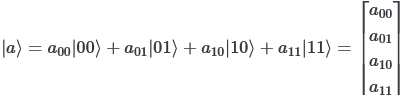

The rules of measurement are still the same as mentioned in [this article](https://medium.com/@_monitsharma/learn-quantum-computing-with-qiskit-representing-qubit-state-aed033b612d0)


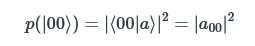

And the same implications hold, such as the normalisation condition:

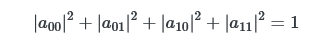

If we have two separated qubits, we can describe their collective state using the kronecker product:

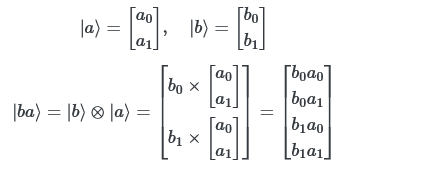

And following the same rules, we can use the kronecker product to describe the collective state of any number of qubits. Here is an example with three qubits:

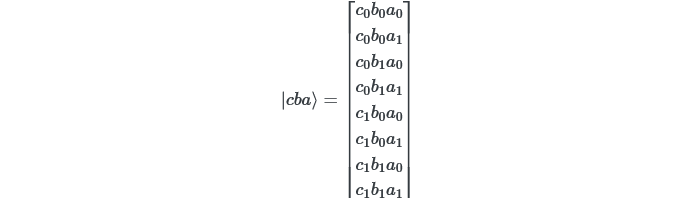


If we have $n$ qubits, we will need to keep track of $2^n$
complex amplitudes. As we can see, these vectors grow exponentially with the number of qubits. This is the reason quantum computers with large numbers of qubits are so difficult to simulate. A modern laptop can easily simulate a general quantum state of around $20$ qubits, but simulating $100$ qubits is too difficult for the largest supercomputers.

Let's code this up:

In [21]:
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector

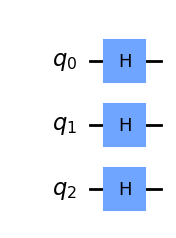

In [22]:
qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for i in range(3):
    qc.h(i)
# See the circuit:
qc.draw('mpl')

Each qubit is in the state $|+\rangle$, so we should see this vector:


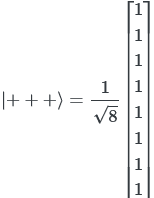

In [23]:
# Let's see the result
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()

final_state = sim.run(qc).result().get_statevector()




In Jupyter Notebooks we can display this nicely using Latex. If not using Jupyter Notebooks you may need to remove the `array_to_latex` function and use `print(final_state)` instead.

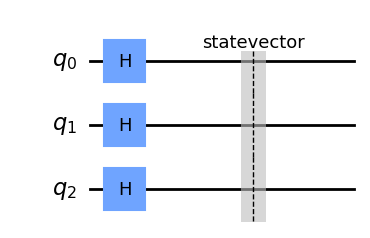

In [24]:
qc.draw('mpl')

In [25]:
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

## Single Qubit Gates on Multi-Qubit Statevectors


We know that $X$ gate is represented by the matrix

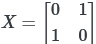


and when it acts on the $|0⟩$ , it becomes:

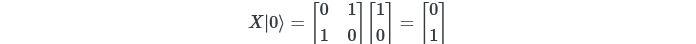

but how it acts on multiple qubits. Turns out, it;s very trivial, we just need the kronecker product to calculate multi-qubit statevectors, and we use tensor products to calculate the matrices.


**if you wane to learn about tensor products, reviisit the previous article on [linear algebra](https://medium.com/@_monitsharma/learn-quantum-computing-with-qiskit-linear-algebra-501587c3297d)

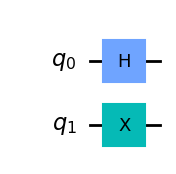

In [26]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw('mpl')

we can represent the simultaneous operations (H & X) using their kronecker product:

Screenshot 2023-07-17 at 17-11-05 Multiple Qubits and Entangled States.png






The operation looks like this:

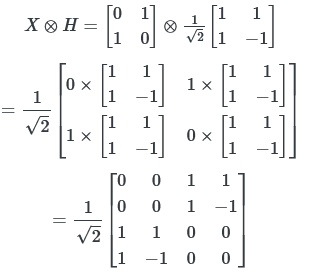

Which we can then apply to our 4D statevector. This can become quite messy, you will often see the clearer notation:

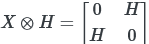


Instead of calculating this by hand, we can use Qiskit’s aer_simulator to calculate this for us. The Aer simulator multiplies all the gates in our circuit together to compile a single unitary matrix that performs the whole quantum circuit:

In [27]:
sim = Aer.get_backend('aer_simulator')
qc.save_unitary()   # save the unitatry matrix
unitary =  sim.run(qc).result().get_unitary()

Let's see the result in matrix form:

In [28]:
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the
# array_to_latex function and use print(unitary) instead.
from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

If we want to apply a gate to only one qubit at a time (such as in the circuit below), we describe this using kronecker product with the identity matrix, e.g.:


$$ X  \otimes I $$

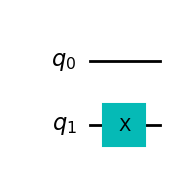

In [29]:
qc = QuantumCircuit(2)
qc.x(1)
qc.draw('mpl')

Simulate and see the matrix:

In [30]:
# Simulate the unitary
sim = Aer.get_backend('aer_simulator')
qc.save_unitary()

unitary = sim.run(qc).result().get_unitary()
# Display the results:
array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

We can see Qiskit has performed the kronecker product:

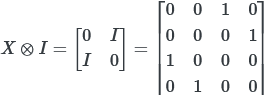


## Multi Qubit Gates


Now we have seen how the states of single qubit gates represented on multiple qubits. We will now see how multiple qubit gates make the qubits interact with each other. An important two Qubit gate is the **CNOT** gate.

### The CNOT Gate

This gate is a conditional gate, it performs the $X$ gate operation on the target qubit , if and only if the state of the control qubit is $|1⟩$. Let's see this in action:

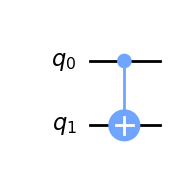

In [31]:
qc = QuantumCircuit(2)
# appkt the cnot gate

qc.cx(0,1)   # the first number represent the control qubit and the second qubit represent the target qubit

# draw it

qc.draw('mpl')

It's very simple to understand the action of this qubit from the below truth table:

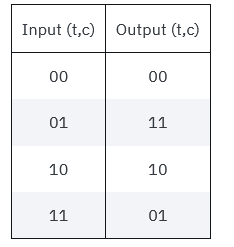

And acting on our $4D$ statevector, it has one of the two matrices:

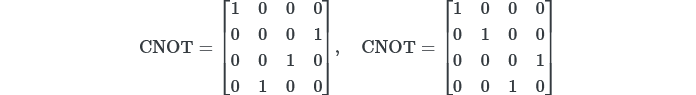

depending on which qubit is the control and which qubit is the target. The left matrix represent the state of our circuit given above. This matrix swaps the amplitudes of $|01⟩$ and $|11⟩$ in our statevector


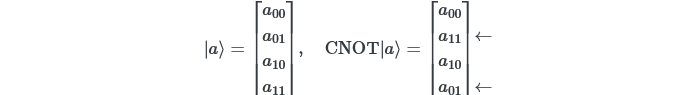

In [32]:
# Simulate the unitary
sim = Aer.get_backend('aer_simulator')
qc.save_unitary()

unitary = sim.run(qc).result().get_unitary()
# Display the results:
array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

Here we see, we get the same matrix, as we have described. Now to get the other matrix, just change the target and control qubit in the circuit, as done below:

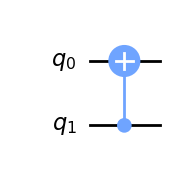

In [33]:
qc = QuantumCircuit(2)
# appkt the cnot gate

qc.cx(1,0)   # the first number represent the control qubit and the second qubit represent the target qubit

# draw it

qc.draw('mpl')

In [34]:
# Simulate the unitary
sim = Aer.get_backend('aer_simulator')
qc.save_unitary()

unitary = sim.run(qc).result().get_unitary()
# Display the results:
array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

Here you see we get the other matrix.

**What happens in Superposition?**

Let's see what happens when our qubit is in superposition. We will put one qubit in $|+\rangle$ state:

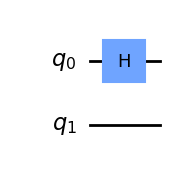

In [35]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
qc.draw('mpl')

In [36]:
# Let's see the result:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
final_state = sim.run(qc).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

As expected, this produces the state $|0⟩ ⊗ |+⟩ = |0+⟩$

Screenshot 2023-07-18 at 09-39-43 Multiple Qubits and Entangled States.png



*Note*
Don't get confused by $\frac{\sqrt{2}}{2}$ in the output, it's same as $\frac{1}{\sqrt{2}}$

Now, Let's apply the CNOT gate:

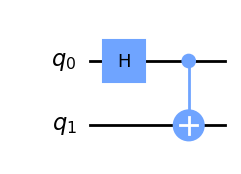

In [41]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw('mpl')

In [42]:
# Let's get the result:
qc.save_statevector()
result = sim.run(qc).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

We see we have the state:

Screenshot 2023-07-18 at 09-42-37 Multiple Qubits and Entangled States.png

This state is **very important** to us, because this state is **Entangled**

### Entangled States

We created the state:

$$ \frac{1}{\sqrt{2}}( |00\rangle + |11⟩)$$

in the previous section.


This is known as the *Bell State*. We can see that this state has $50\%$ probability of being measured in the state $|00⟩$ and $50\%$ chance of being measured in the state $|11\rangle$. Interestingly, it has $0\%$ chance of neimng measured in the state $|01\rangle$ abd $|10⟩$.


Let's see that:

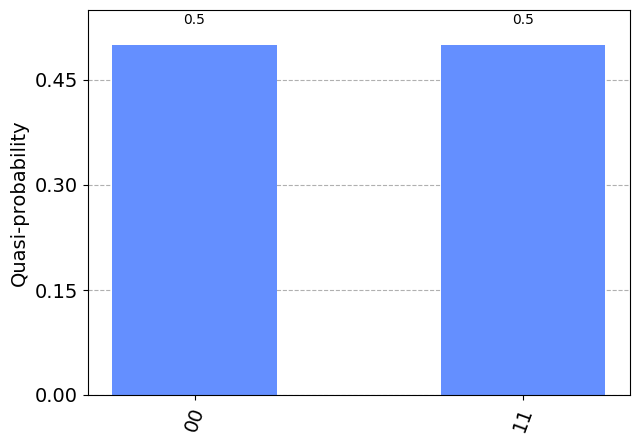

In [44]:
plot_histogram(result.get_counts())

This combined state cannot be written as two separate qubit states, which in turn has interesting imploications. Although our qubits are in superposition, measuring one will tell us the state of the other and collapse its superposition. For example, if we measured the top qubit and got the state $|1⟩$, the collective state of our qubits changes like so:


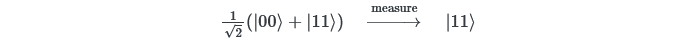


Even if we separated these qubits light-years away, measuring one qubit collapses the superposition and appears to have an immediate effect on the other. This is the ‘[spooky action at a distance](https://en.wikipedia.org/wiki/Quantum_nonlocality)’ that upset so many physicists in the early 20th century.

It’s important to note that the measurement result is random, and the measurement statistics of one qubit are not affected by any operation on the other qubit. Because of this, there is no way to use shared quantum states to communicate. This is known as the no-communication theorem

## Visualizing the Entangled States

We know that these states can't be written as two separate qubit states, this also measn we los information when we try to plot it on Bloch sphere:

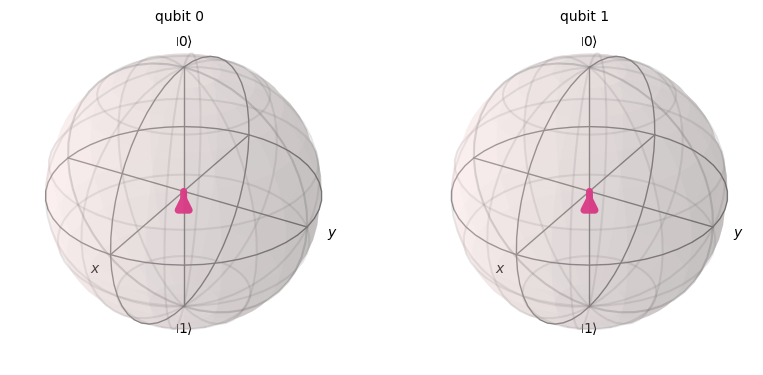

In [45]:
plot_bloch_multivector(final_state)

It's not be clear how Qiskit even calculates the Bloch vectors with entangled qubits like this, because in single-qubit case, the position of bloch vector along an axis nicely corresponds to the expectation value of measuring in that basis. If we take this as the rule of plotting Bloch vectors, we arrive at this conclusion above.

This shows us there is no single-qubit measurement basis for which a specific measurement is guaranteed. This contrasts with our single qubit states, in which we could always pick a single-qubit basis. Looking at the individual qubits in this way, we miss the important effect of correlation between the qubits. We cannot distinguish between different entangled states. For example, the two states:

Screenshot 2023-07-18 at 09-58-55 Multiple Qubits and Entangled States.png



will both look the same on these separate Bloch spheres, despite being very different states with different measurement outcomes.

**How else could we visualize this statevector? **

This statevector is simply a collection of four amplitudes (complex numbers), and there are endless ways we can map this to an image. One such visualization is the Q-sphere, here each amplitude is represented by a blob on the surface of a sphere. The size of the blob is proportional to the magnitude of the amplitude, and the colour is proportional to the phase of the amplitude.
The amplitudes for $|00\rangle$ and $|11⟩$ are equal, and all other amplitudes are 0:

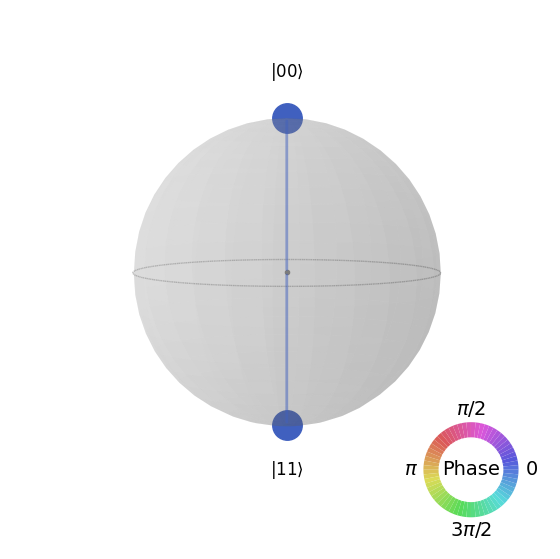

In [46]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(final_state)

Here we can clearly see the correlation between the qubits. The Q-sphere's shape has no significance, it is simply a nice way of arranging our blobs; the number of 0s in the state is proportional to the states position on the Z-axis, so here we can see the amplitude of $|00⟩$ is at the top pole of the sphere, and the amplitude of $|11\rangle$ is at the bottom pole of the sphere.

In the next tutorial we will explore more about the CNOT gate and will learn about an interesting phenomeno of **Phase Kickback**.